In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
headers = pd.read_csv('../data/out.dat', delim_whitespace=True, nrows=0).columns[1:]
results = pd.read_csv('../data/out.dat', delim_whitespace=True, header=None, skiprows=1, names=headers)

display(results)

,ImpactParameter,S_AB,Stderr(S_AB)
0,0.05,0.000132,2.528630e-07
1,0.15,0.000137,2.654520e-07
2,0.25,0.000148,2.996050e-07
3,0.35,0.000164,1.813440e-07
4,0.45,0.000189,1.923000e-07
...,...,...,...
195,19.55,1.000000,0.000000e+00
196,19.65,1.000000,0.000000e+00
197,19.75,1.000000,0.000000e+00
198,19.85,1.000000,0.000000e+00


In [3]:
b = np.array(results['ImpactParameter'])
S_AB = np.array(results['S_AB'])
S_AB_stderr = np.array(results['Stderr(S_AB)'])

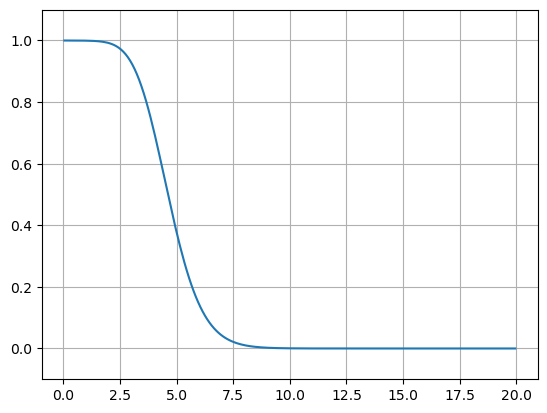

In [4]:
fig, ax = plt.subplots()

ax.plot(b, (1 - S_AB))

ax.grid()
ax.set_ylim(-0.1, 1.1)

plt.show()

In [5]:
10 * np.sqrt(np.sum(np.convolve((b * S_AB_stderr) ** 2, np.ones(2) / 2, mode='valid') * np.convolve(b, np.array([1, -1]), mode='valid') / 2))

0.0011318581361470408

In [6]:
sigma_tot = 10 * 4 * np.pi * np.sum(np.convolve((1 - S_AB) * b, np.ones(2) / 2, mode='valid') * np.convolve(b, np.array([1, -1]), mode='valid'))

print(sigma_tot, "mb")

1486.2155095577127 mb


In [7]:
sigma_el = 10 * 2 * np.pi * np.sum(np.convolve((1 - S_AB) ** 2 * b, np.ones(2) / 2, mode='valid') * np.convolve(b, np.array([1, -1]), mode='valid'))

print(sigma_el, "mb")

532.6083345475967 mb


In [8]:
sigma_reac = 10 * 2 * np.pi * np.sum(np.convolve((1 - S_AB ** 2) * b, np.ones(2) / 2, mode='valid') * np.convolve(b, np.array([1, -1]), mode='valid'))

print(sigma_reac, "mb")

953.607175010116 mb
